### Experiments with time-dependent evolution of reaction equations

In class we described reaction processes such as 

$ATP \rightarrow 0$ (e.g. ATP getting consumed)

or equilibria between open and closed states:

$ADP \leftrightarrow ATP $    

Each of these reactions can be written in a form like

$\frac{dATP}{dt} = f(t)$

where $f(t)$ might describe the rate at which ATP is consumed or created. 

The point of this notebook is to predict the time dependent values of ATP, for instance, given some function f(t).  For this we will go through steps like defining a function to represent f(t) and using odeint to solve for ATP


In [3]:
# Function for integreating ODE and displaying results
import scipy.integrate
from scipy.integrate import odeint
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

#### Simplest system - monoexponential decay
$ATP \rightarrow 0$ at rate $a$ can be written as 

$dy/dt = -a \cdot y$

If we solved this analytically we'd get

Solution:
$y = c e^{-at}$

In [4]:
# this function describes the 'right hand side' of the dy/dt equation above. 
# Note that we have 'a' as our rate constant and y[0] is the value of y at the present time
def f(y,t,a):
    dydt = -a*y[0]
    return dydt

# points in time, e.g. t=0 to t=10. where the function gets evaluated, t[0] at y0
t  = scipy.linspace(0.,10.,201)
# init concentration of value of y
y0 = [16.]

# rate
a=0.5  # 
y = scipy.integrate.odeint(f,y0,t,args=(a,))

Below are the data from the class demonstration

#### Simple system - two components
Here we assume we have two entities (y0 and y1) that are each getting consumed

\begin{align}
\dot{y_0} &= -a_{00} y_0 \\
\dot{y_1} &= -a_{11} y_1 \\
\end{align}



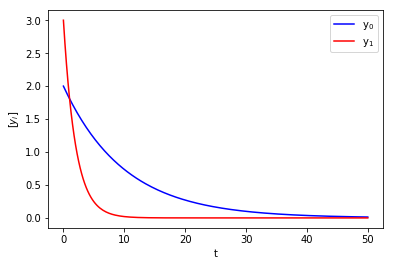

In [8]:
def f(y,t,a):
    dy0dt = -a[0]*y[0]
    dy1dt = -a[1]*y[1]
    return [dy0dt,dy1dt]
    
    
t  = scipy.linspace(0.,50.,201)

# Initial conc. 
y0 = [2,3]

# initial rates 
a=[0.1,0.5]

y = scipy.integrate.odeint(f,y0,t,args=(a,))
plt.plot(t,y[:,0],"b-",label="y$_0$")
plt.plot(t,y[:,1],"r-",label="y$_1$")
plt.ylabel("$[y_i]$")
plt.xlabel("t")
plt.legend(loc=0)
    

For the equilibrium 

$y_0 \leftrightarrow y_1$

we can write 

\begin{align}
\dot{y_0} &= -k_f y_0 + k_m y_1\\
\dot{y_1} &=  k_f y_0 - k_m y_1 \\
\end{align}

where kf is the rate at which y1 is formed from y0 and vice versa for km.


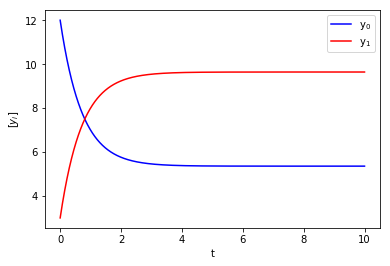

In [29]:
def f(y,t,a):
    
    dy0dt = -a[0]*y[0] +   a[1]*y[1]
    dy1dt =  a[0]*y[0] +  -a[1]*y[1]
    dydt = [dy0dt,dy1dt]
    return dydt
    
    
t  = scipy.linspace(0.,10.,2001)

# Initial conc. 
y0 = [12,3]

# initial rates 
a=np.array([0.9,0.5])

y = scipy.integrate.odeint(f,y0,t,args=(a,))
plt.plot(t,y[:,0],"b-",label="y$_0$")
plt.plot(t,y[:,1],"r-",label="y$_1$")
plt.ylabel("$[y_i]$")
plt.xlabel("t")
plt.legend(loc=0)

<font color=red>Can skip after this, but you might find these examples useful later </font>

The above process can be more generally written as a 'linear system'

$\frac{dy[0]}{dt} = a\cdot y[0] +b\cdot y[1]$

$\frac{dy[1]}{dt} = c\cdot y[0]+d\cdot y[1]$ 

so we can instead write

dydt = A*y


where A is the 'Jacobian' :
( $a_{ij} = \frac{dy_i}{da_j}$)
 
 
First verifying that diagonal Jacobian with negative rate constants yields exponential decay

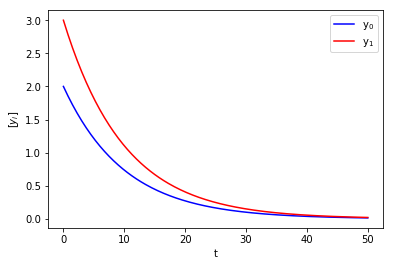

In [4]:

def f(y,t,a):
  return np.dot(a,y)
#    return [a[0,0]*y[0] + a[0,1]*y[1],\
#            a[1,0]*y[0] + a[1,1]*y[1]]


t  = scipy.linspace(0.,50.,201)

# Initial conc. 
y0 = [2,3]

# Jacobian
J = 0.1*np.array([[-1.0,0.],[0,-1.]])

y = scipy.integrate.odeint(f,y0,t,args=(J,))
plt.plot(t,y[:,0],"b-",label="y$_0$")
plt.plot(t,y[:,1],"r-",label="y$_1$")
plt.ylabel("$[y_i]$")
plt.xlabel("t")
plt.legend(loc=0)


#### Simple system - two components in equilibrium

$y_0 \leftrightarrow y_1$

\begin{align}
\dot{y_0} &= -k_f y_0 + k_m y_1\\
\dot{y_1} &=  k_f y_0 - k_m y_1 \\
\end{align}



In [5]:

# Jacobian
kf=3.0
kb=1.0
J1 = np.array([
  [-kf,kb],
  [kf,-kb],
])   
t  = scipy.linspace(0.,1.,201)

# our initial concentration 
y0 = 12
y1 = 4

ys = np.array([y0,y1],dtype=np.float)
daSum = np.sum(ys)
y = scipy.integrate.odeint(f,ys,t,args=(J1,))


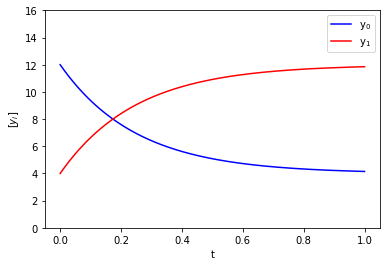

In [6]:

plt.plot(t,y[:,0],"b-",label="y$_0$")
plt.plot(t,y[:,1],"r-",label="y$_1$")
plt.ylabel("$[y_i]$")
plt.xlabel("t")
plt.ylim([0,daSum])
plt.legend(loc=0)


#### Multi-component system with transition probability matrix J

Using Jacobian:
 ( $a_{ij} = \frac{dy_i}{da_j}$)
 
 

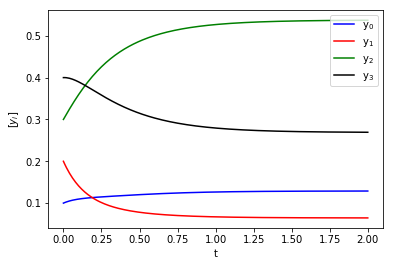

In [44]:
# points in time where the function gets evaluated, t[0] at y0
t  = scipy.linspace(0.,2.,201)



# Jacobian
a=1
b=2.0
g=5.
d=1.2
J = np.array([
  [-(a+g),b,d,0],
  [a,-(b+g),0,d],
  [g,0,-(a+d),b],
  [0,g,a,-(b+d)]
])   
# Initial conc. 
y0 = np.array([1,2,3,4],dtype=np.float)
y0 /= np.sum(y0)


y = scipy.integrate.odeint(f,y0,t,args=(J,))
plt.plot(t,y[:,0],"b-",label="y$_0$")
plt.plot(t,y[:,1],"r-",label="y$_1$")
plt.plot(t,y[:,2],"g-",label="y$_2$")
plt.plot(t,y[:,3],"k-",label="y$_3$")
plt.ylabel("$[y_i]$")
plt.xlabel("t")
plt.legend(loc=0)


#### Example with substrate dependence 
$ 1+c \rightarrow 2$

Here, the system begins near equilibrium, but upon a stepwise increase in 'c' near t=5, the reaction is shifted toward 2. Once 'c' returns to the base value, so do the concentrations of 1 and 2



In [89]:
def f(y,t):
    
    if np.abs(t-5)<1.:
        c=0.3
    else:
        c=0.1
    
    # Jacobian
    k14=10*c
    k41=1
    a = np.array([
      [-k14,k41],
      [ k14,-k41],
  
    ])    
    
    return np.dot(a,y)

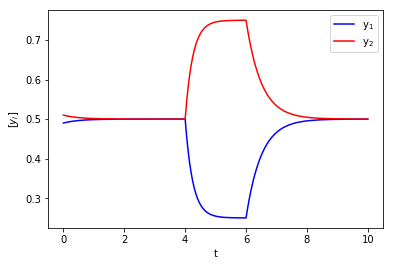

In [90]:
# points in time where the function gets evaluated, t[0] at y0
t  = scipy.linspace(0.,10.,201)



   
# Initial conc. 
y0 = np.array([4.9,5.1],dtype=np.float)
y0 /= np.sum(y0)


y = scipy.integrate.odeint(f,y0,t)
plt.plot(t,y[:,0],"b-",label="y$_1$")
plt.plot(t,y[:,1],"r-",label="y$_2$")
plt.ylabel("$[y_i]$")
plt.xlabel("t")
plt.legend(loc=0)
